#  **Deep Learning Assingment 2**
Name: Junaid Ahmed   Roll# CS-105/2022/23

**MODEL 1** **INCEPTION VERSION 3**


In [ ]:
#Making a directory and fetching data form kaggle through API

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#URDU ALBHABETS DATASET BY HAZRAT ALI (https://www.kaggle.com/datasets/hazrat/uhat-urdu-handwritten-text-dataset)
! kaggle datasets download -d hazrat/uhat-urdu-handwritten-text-dataset

 99% 43.0M/43.4M [00:00<00:00, 156MB/s] 
100% 43.4M/43.4M [00:00<00:00, 130MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/uhat-urdu-handwritten-text-dataset.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files
from keras.utils import np_utils
from tensorflow.keras.utils import img_to_array, load_img, array_to_img
from tensorflow.keras.layers import Dense,Flatten ,Dropout, BatchNormalization,Rescaling


In [ ]:
# Making data_paths
data_path = '/content/data/data'
train_path = '/content/data/data/characters_train_set'
test_path = '/content/data/data/characters_test_set'

In [ ]:
batch_size = 32
img_width =224
img_height =224
input_shape = (224,224,3)

In [ ]:
# Dividing the data in training and validation sets
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
                  train_path,
                  validation_split = 0.1,
                  subset="both",
                  seed=42,
                  image_size=(img_height, img_width),
                  batch_size=batch_size
)


Found 28328 files belonging to 40 classes.
Using 25496 files for training.
Using 2832 files for validation.


In [ ]:
# Checking the classes in the datasets, total 40 classes are in the dataset
class_names = train_ds.class_names
print(class_names)

['alif', 'alif mad aa', 'ayn', 'baa', 'bari yaa', 'cheey', 'choti yaa', 'daal', 'dhaal', 'faa', 'gaaf', 'ghain', 'haa1', 'haa2', 'haa3', 'hamza', 'jeem', 'kaaf', 'khaa', 'laam', 'meem', 'noon', 'noonghunna', 'paa', 'qaaf', 'raa', 'rhraa', 'seen', 'seey', 'sheen', 'swaad', 'taa', 'ttaa', 'twa', 'waw', 'zaaa', 'zaal', 'zhaa', 'zwaa', 'zwaad']


In [ ]:
#Assigning indices to classes
idx_to_classes = {idx: class_name for idx, class_name in enumerate(train_ds.class_names)}
print(idx_to_classes)

{0: 'alif', 1: 'alif mad aa', 2: 'ayn', 3: 'baa', 4: 'bari yaa', 5: 'cheey', 6: 'choti yaa', 7: 'daal', 8: 'dhaal', 9: 'faa', 10: 'gaaf', 11: 'ghain', 12: 'haa1', 13: 'haa2', 14: 'haa3', 15: 'hamza', 16: 'jeem', 17: 'kaaf', 18: 'khaa', 19: 'laam', 20: 'meem', 21: 'noon', 22: 'noonghunna', 23: 'paa', 24: 'qaaf', 25: 'raa', 26: 'rhraa', 27: 'seen', 28: 'seey', 29: 'sheen', 30: 'swaad', 31: 'taa', 32: 'ttaa', 33: 'twa', 34: 'waw', 35: 'zaaa', 36: 'zaal', 37: 'zhaa', 38: 'zwaa', 39: 'zwaad'}


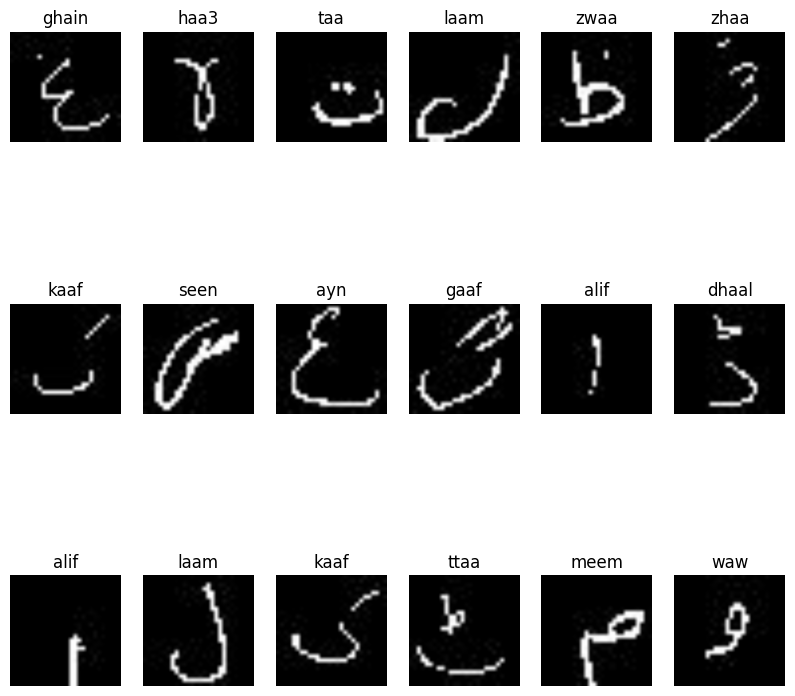

In [ ]:
#let us show the different urdu alphabets
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(18):
    ax = plt.subplot(3, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
train_samples_per_batch = print('train_samples_per_batch =', len(train_ds))
testing_samples_per_batch = print('testing_samples_per_batch =', len(val_ds))

train_samples_per_batch = 797
testing_samples_per_batch = 89


In [ ]:
# class_indices have the numeric tag for each balls
import pickle
TrainClasses=idx_to_classes

# Storing the face and the numeric tag for future reference
ResultMap={}
for word, wordValue in zip(idx_to_classes.values(),idx_to_classes.keys()):
    ResultMap[wordValue]=word

# Saving the face map for future reference

with open(R"E:\Data Sets\Balls Classification\ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'alif', 1: 'alif mad aa', 2: 'ayn', 3: 'baa', 4: 'bari yaa', 5: 'cheey', 6: 'choti yaa', 7: 'daal', 8: 'dhaal', 9: 'faa', 10: 'gaaf', 11: 'ghain', 12: 'haa1', 13: 'haa2', 14: 'haa3', 15: 'hamza', 16: 'jeem', 17: 'kaaf', 18: 'khaa', 19: 'laam', 20: 'meem', 21: 'noon', 22: 'noonghunna', 23: 'paa', 24: 'qaaf', 25: 'raa', 26: 'rhraa', 27: 'seen', 28: 'seey', 29: 'sheen', 30: 'swaad', 31: 'taa', 32: 'ttaa', 33: 'twa', 34: 'waw', 35: 'zaaa', 36: 'zaal', 37: 'zhaa', 38: 'zwaa', 39: 'zwaad'}

 The Number of output neurons:  40


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = '/content/drive/MyDrive/Colab Notebooks/call_backs'
checkpoint = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
%%time
model_inceptV3= InceptionV3(weights = "imagenet", include_top=False, input_shape = (224,224, 3))


87910968/87910968 [==============================] - 0s 0us/step
CPU times: user 3.52 s, sys: 679 ms, total: 4.2 s
Wall time: 3.78 s


In [ ]:
model_inceptV3.summary()

In [ ]:
for layer in model_inceptV3.layers:
    layer.trainable = False

In [ ]:
model_inceptV3.summary()

In [ ]:
#freezing the extractor and saving last layer
last_layer_inceptV3= model_inceptV3.get_layer('mixed10') #Saving the last layer of the network

last_layer_output = last_layer_inceptV3.output #Saving the output of the last layer to be the input of the next layer

x = Flatten()(last_layer_output) #Flattenning the classifier input, which is the output of the last layer of the inception model
x = Rescaling(1./255)(x)
x = Dense(50, activation='relu', name='FC_2')(x) #Adding 1 dense layer of 64 neurons
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(40, activation='softmax', name='classifer')(x) # our dataset is 40 class dataset, putting 40 softmax neuron to it


model_inceptV3 = Model(inputs=model_inceptV3.input, outputs=x) #Instantiating a new_model


In [ ]:
model_inceptV3.summary()

In [ ]:
model_inceptV3.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
#Training the model
history_inceptV3 = model_inceptV3.fit(train_ds, batch_size=batch_size, steps_per_epoch=len(train_ds), epochs=10,
                    verbose=0, validation_data=val_ds , callbacks =[checkpoint])


Epoch 1: val_accuracy improved from -inf to 0.79626, saving model to /content/drive/MyDrive/Colab Notebooks/call_backs



Epoch 2: val_accuracy improved from 0.79626 to 0.85275, saving model to /content/drive/MyDrive/Colab Notebooks/call_backs



Epoch 3: val_accuracy improved from 0.85275 to 0.85840, saving model to /content/drive/MyDrive/Colab Notebooks/call_backs



Epoch 4: val_accuracy improved from 0.85840 to 0.85911, saving model to /content/drive/MyDrive/Colab Notebooks/call_backs



Epoch 5: val_accuracy improved from 0.85911 to 0.88665, saving model to /content/drive/MyDrive/Colab Notebooks/call_backs



Epoch 6: val_accuracy did not improve from 0.88665

Epoch 7: val_accuracy did not improve from 0.88665

Epoch 8: val_accuracy did not improve from 0.88665

Epoch 9: val_accuracy did not improve from 0.88665

Epoch 10: val_accuracy improved from 0.88665 to 0.90042, saving model to /content/drive/MyDrive/Colab Notebooks/call_backs


CPU times: user 18h 45min 5s, sys: 54min 48s, total: 19h 39min 54s
Wall time: 40min 15s


**EVALUATING INCEPTION V3 PERFORMANCE**

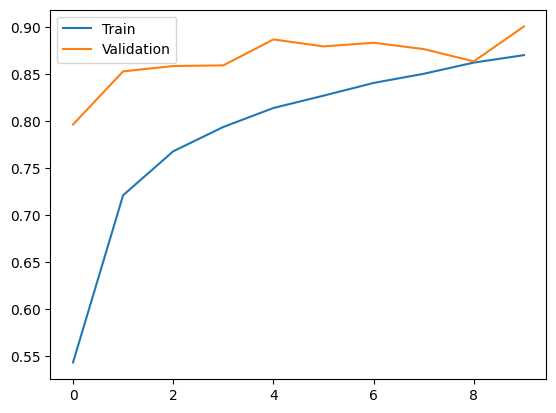

In [ ]:
#Plotting the learning curves for train and test accuracy
plt.plot(history_inceptV3.history['accuracy'], label='Train')
plt.plot(history_inceptV3.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

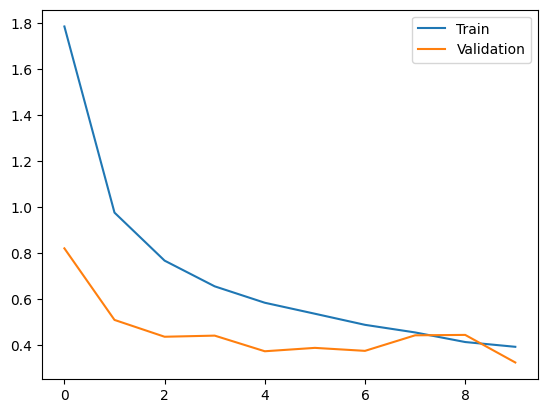

In [ ]:
#Plotting the learning curves for train and test loss
plt.plot(history_inceptV3.history['loss'], label='Train')
plt.plot(history_inceptV3.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [ ]:
model_inceptV3.metrics_names

['loss', 'accuracy']

In [ ]:
#Let us print the loss function value and overall accuracy of our model on train as well as test data.
train_loss, train_accuracy = model_inceptV3.evaluate(train_ds)
val_loss, val_accuracy = model_inceptV3.evaluate(val_ds)
print(f'Train loss is {train_loss:0.3} and train accuracy is {train_accuracy:0.1%}')
print(f'validation loss is {val_loss:0.3} and validation accuracy is {val_accuracy:0.1%}')

89/89 [==============================] - 22s 248ms/step - loss: 0.3256 - accuracy: 0.9004
Train loss is 0.0785 and train accuracy is 97.7%
validation loss is 0.326 and validation accuracy is 90.0%


**MAKING INDIVIDUAL PREDICTIONS ON INCEPTIONV3**

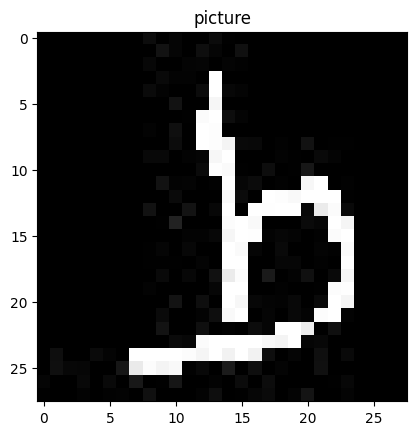

########################################
Our Models InceptionV3 Prediction is:  twa


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/Twaa/twaa (107).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models InceptionV3 Prediction is: ', ResultMap[np.argmax(result)])

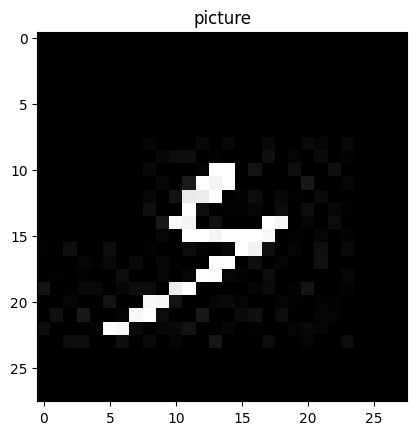

########################################
Our Models InceptionV3 Prediction is:  hamza


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/Hamza/hamza (105).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models InceptionV3 Prediction is: ', ResultMap[np.argmax(result)])

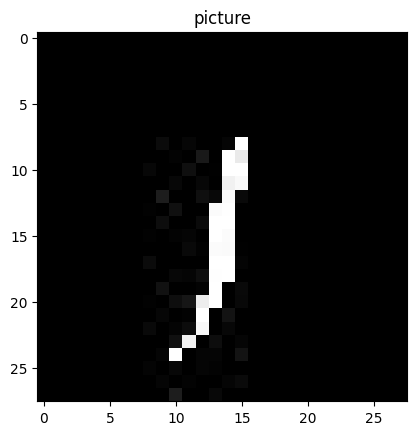

########################################
Our Models InceptionV3 Prediction is:  alif


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/alif/alif (108).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models InceptionV3 Prediction is: ', ResultMap[np.argmax(result)])

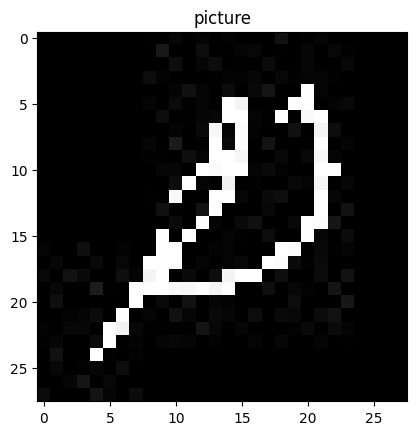

########################################
Our Models InceptionV3 Prediction is:  haa2


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/haa2/haa2 (106).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models InceptionV3 Prediction is: ', ResultMap[np.argmax(result)])

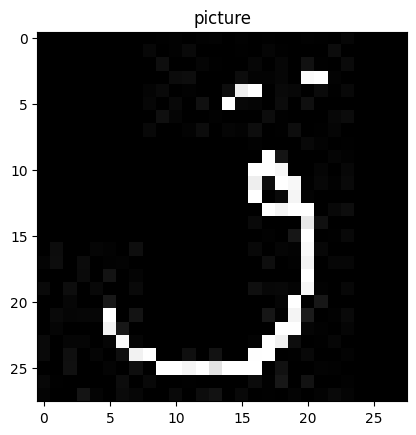

########################################
Our Models InceptionV3 Prediction is:  qaaf


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/qaaf/qaaf (103).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models InceptionV3 Prediction is: ', ResultMap[np.argmax(result)])

# **Model 2 DenseNet121**

In [ ]:
from keras.applications import DenseNet121

In [ ]:
%%time
 model_Dens= DenseNet121(weights = "imagenet", include_top=False, input_shape = (224,224, 3))

29084464/29084464 [==============================] - 0s 0us/step
CPU times: user 4.35 s, sys: 156 ms, total: 4.51 s
Wall time: 4.43 s


In [ ]:
for layer in model_Dens.layers:
    layer.trainable = False

In [ ]:
model_Dens.summary()

In [ ]:
#freezing the extractor and saving last layer
last_layer_Dens = model_Dens.get_layer('relu') #Saving the last layer of the network

last_layer_output = last_layer_Dens.output #Saving the output of the last layer to be the input of the next layer

x = Flatten()(last_layer_output) #Flattenning the classifier input, which is the output of the last layer of the DensNet121
x = Rescaling(1./255)(x) #adding rescaling layer
x = Dense(50, activation='relu', name='FC_2')(x) #Adding 1 dense layer of 64 neurons
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(40, activation='softmax', name='classifer')(x) #Adding our new softmax layer with two hidden units

model_Dens = Model(inputs=model_Dens.input, outputs=x) #Instantiating a new_model


In [ ]:
model_Dens.summary()

In [ ]:
model_Dens.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
history_Dens = model_Dens.fit(train_ds, epochs= 3, verbose = 0, validation_data=val_ds,steps_per_epoch=len(train_ds), callbacks =[checkpoint])

**EVALUATING DENSNET121 PERFORMANCE**


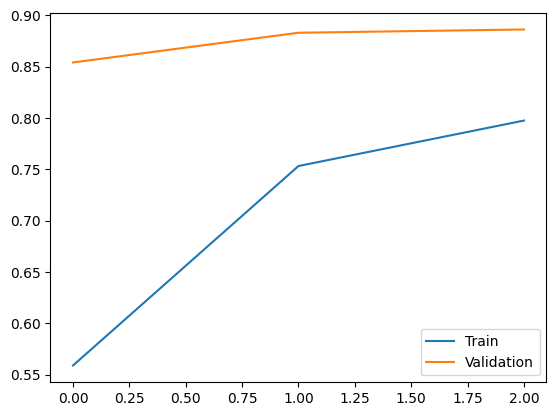

In [ ]:
#Plotting the learning curves for train and test accuracy
plt.plot(history_Dens.history['accuracy'], label='Train')
plt.plot(history_Dens.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

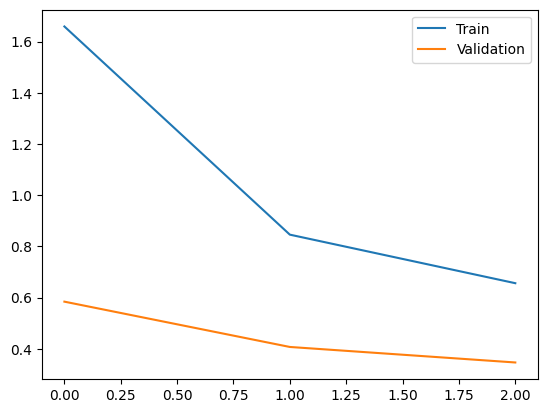

In [ ]:
#Plotting the learning curves for train and test loss
plt.plot(history_Dens.history['loss'], label='Train')
plt.plot(history_Dens.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [ ]:
model_Dens.metrics_names

['loss', 'accuracy']

In [ ]:
#Let us print the loss function value and overall accuracy of our model on train as well as test data.
train_loss, train_accuracy = model_Dens.evaluate(train_ds)
val_loss, val_accuracy = model_Dens.evaluate(val_ds)
print(f'Train loss is {train_loss:0.3} and train accuracy is {train_accuracy:0.1%}')
print(f'validation loss is {val_loss:0.3} and validaiton accuracy is {val_accuracy:0.1%}')

89/89 [==============================] - 58s 650ms/step - loss: 0.3469 - accuracy: 0.8863
Train loss is 0.269 and train accuracy is 91.9%
validation loss is 0.347 and validaiton accuracy is 88.6%


**MAKING INDIVIDUAL PREDICTIONS ON DENSNET121**

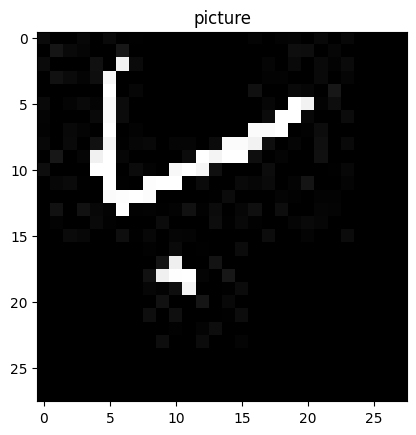

########################################
Our Models DenseNet121 Prediction is:  paa


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/baa/baa (118).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models DenseNet121 Prediction is: ', ResultMap[np.argmax(result)])

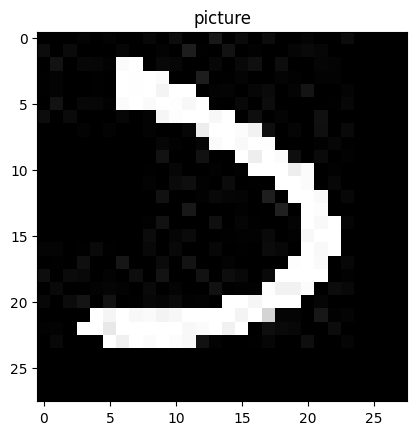

########################################
Our Models DenseNet Prediction is:  seen


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/daal/daal (106).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models DenseNet Prediction is: ', ResultMap[np.argmax(result)])

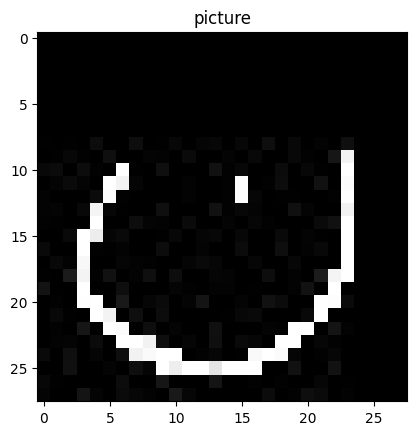

########################################
Our Models DenseNet Prediction is:  noon


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/noon/noon (106).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models DenseNet Prediction is: ', ResultMap[np.argmax(result)])

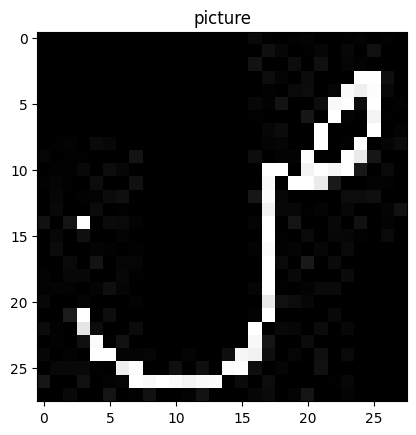

########################################
Our Models DenseNet Prediction is:  gaaf


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/swaad/swaad (16).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models DenseNet Prediction is: ', ResultMap[np.argmax(result)])

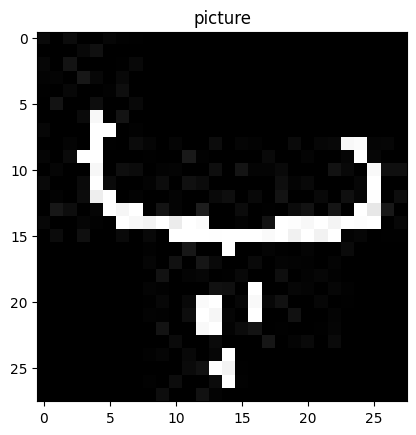

########################################
Our Models DenseNet Prediction is:  paa


In [ ]:
'''########################## Making single predictions ############################'''

testImage='/content/data/data/characters_test_set/paa/paa (115).jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_inceptV3.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Our Models DenseNet Prediction is: ', ResultMap[np.argmax(result)])

**END**